In [1]:
import numpy as numpy
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/bacch/Desktop/githubh/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [5]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [6]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
#Make sex a numnber
df['sex']= df['sex'].apply(lambda x: 1 if x=='male' else 0)
df['smoker']= df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [13]:
#One hot encoding for regions
df=df.join(pd.get_dummies(df.region, dtype=int)).drop('region',axis=1) #either true or false and joint with original
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

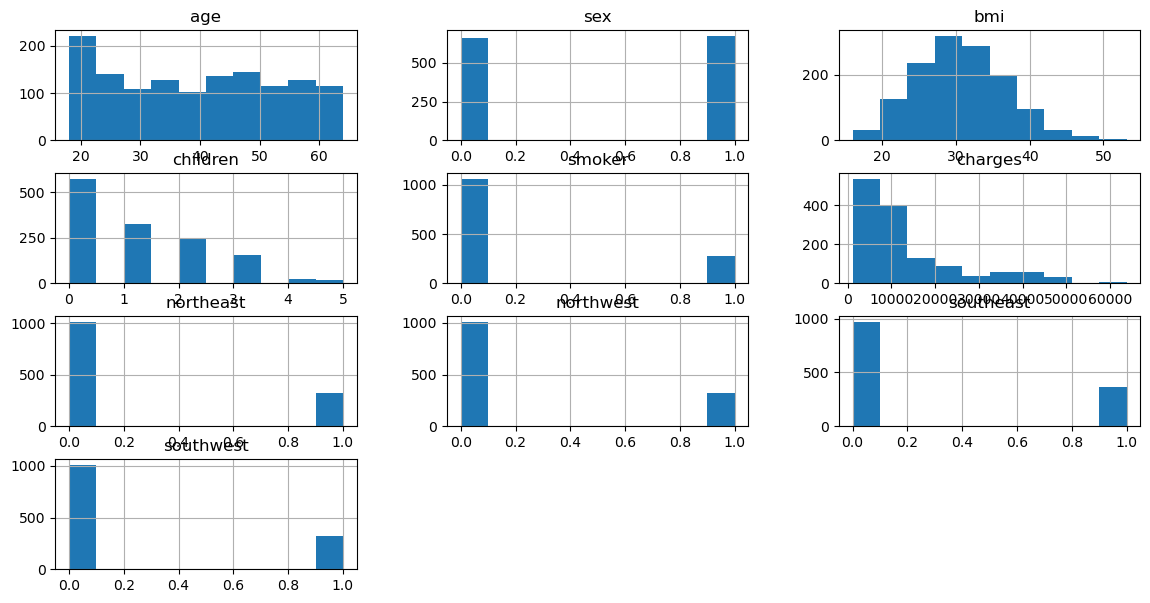

In [15]:
#PLot it
df.hist(figsize=(14,7))

In [16]:
#See for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int32  
 7   northwest  1338 non-null   int32  
 8   southeast  1338 non-null   int32  
 9   southwest  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.8 KB


<Axes: >

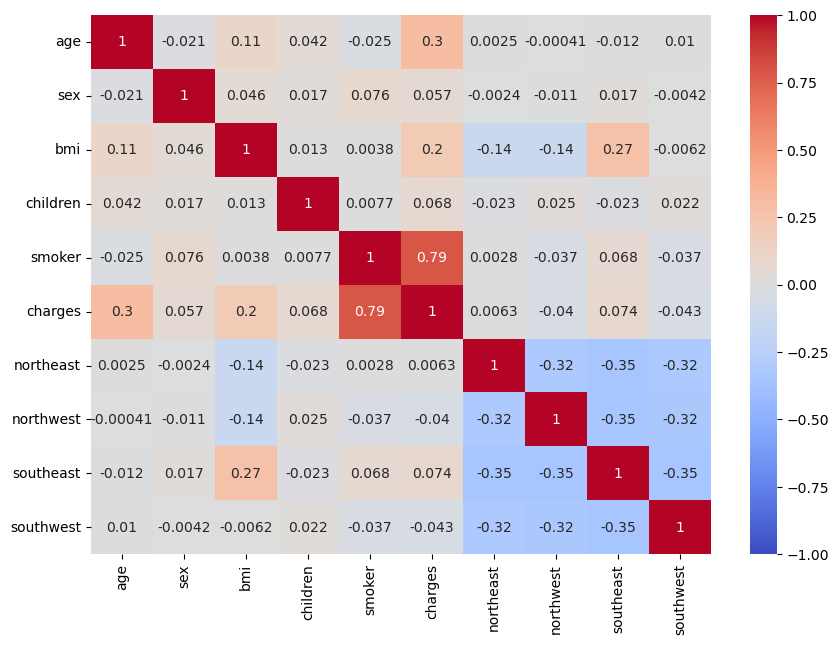

In [19]:
#Do we havge correlations with tragets or among features? internal relations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1,vmax=1)

In [20]:
#Traina  simple random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error #RMSE, MAE

#Divide feature and label
X=df.drop('charges', axis=1)
y=df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [21]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [22]:
#How well out of the box?
model.score(X_test,y_test) #For regression not so good, look at metrics

0.7994527648413272

In [23]:
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
rmse

5244.162093312037

In [24]:
#At all dataset see the deviation
df.charges.std()

12110.011236693994

In [25]:
y_test.std()

11732.202052404067

In [26]:
df.charges.median()

9382.033

In [27]:
mae = mean_absolute_error(y_pred, y_test)
mae

2921.036866624627

Text(0.5, 1.0, 'Prediction vs truth')

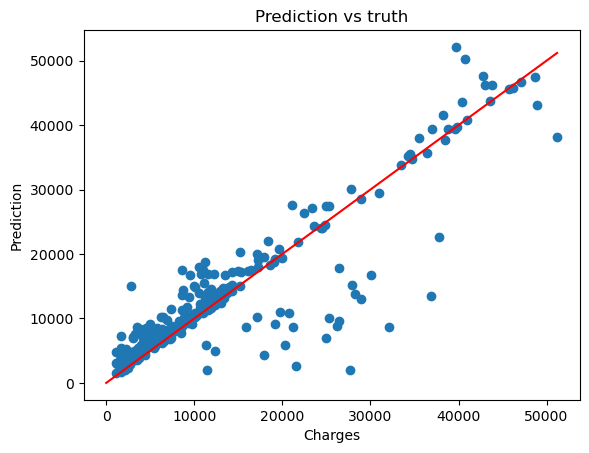

In [34]:
#Visually
import numpy as np

plt.scatter(y_test,y_pred)
#Id function as a line to get reference
plt.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)), color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs truth')

#Some point are not very good prediction because they are far for the middle line

In [35]:
#Look at feature importance for Random forest
feature_importance = sorted(zip(model.feature_names_in_, model.feature_importances_), key= lambda x: x[1], reverse=True)

Text(0.5, 1.0, 'Feature importance')

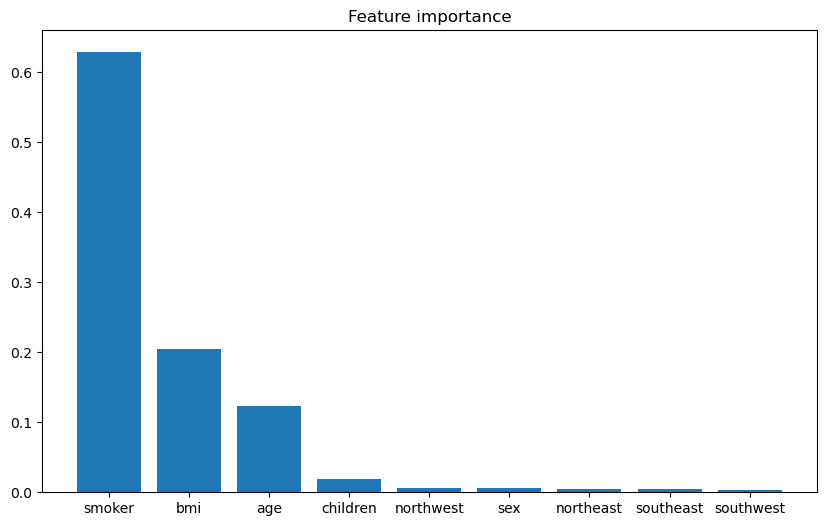

In [37]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in feature_importance], [x[1] for x in feature_importance])
plt.title('Feature importance')

In [42]:
#Hyperparameter tuning for randomeforestrregressor
#GRID SEARCH

from sklearn. model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 2, 5],
    'min_samples_split' :[2,4,6,8],
    'min_samples_leaf' : [1,2,4,6] 
}

#And then cross validation: divide the data in folds train on 4 and evaluate on 5, then train and evaluatre in another etcc.

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid= param_grid, cv=5)


In [43]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
grid_search.best_params_ #If there are some values on the boundary maybe increase them and make the boundary larger

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 6}

In [45]:
model = grid_search.best_estimator_
model

RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=6,
                      n_jobs=-1)

In [ ]:
model.score(X_test,y_test) #Only here test not before 

0.8284396053948421

In [48]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

4850.385821576867

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mae

2585.302721901353

Text(0.5, 1.0, 'Prediction vs truth')

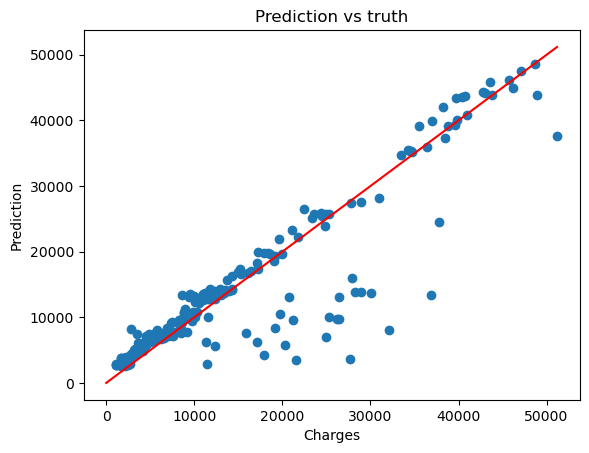

In [50]:
#Visual
plt.scatter(y_test,y_pred)
#Id function as a line to get reference
plt.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)), color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs truth')

In [ ]:
#Hyperparameter tuning for randomeforestrregressor PARTE 2
#GRID SEARCH

from sklearn. model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 2, 5],
    'min_samples_split' :[2,4,6,8],
    'min_samples_leaf' : [1,2,4,6] 
}

#And then cross validation: divide the data in folds train on 4 and evaluate on 5, then train and evaluatre in another etcc.

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid= param_grid, cv=5, scoring='neg_mean_absolute_error')